In [74]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ArrowStyle, FancyArrowPatch
from matplotlib.text import Annotation

In [75]:
# Define a class to draw the blocks and arrows of the diagram
class BlockDiagram:
    def __init__(self, ax):
        self.ax = ax
        self.blocks = {}
        self.arrows = []
        
    def add_block(self, name, center, width, height):
        self.blocks[name] = (center, width, height)
        self.ax.add_patch(plt.Rectangle(
            (center[0] - width/2, center[1] - height/2), width, height, fill=None, edgecolor='k')
        )
        self.ax.text(center[0], center[1], name, fontsize=14, va='center', ha='center')
    
    def add_arrow(self, start, end, text=None, text_pos=None, bidirectional=False):
        self.arrows.append((start, end))
        arrow_style = FancyArrowPatch(
            start, end, connectionstyle='arc3,rad=0.1', arrowstyle='<|-|>', mutation_scale=10, lw=1.5
        )
        self.ax.add_patch(arrow_style)
        if text:
            if not text_pos:
                # Default position is the midpoint of the arrow
                text_pos = ((start[0] + end[0]) / 2, (start[1] + end[1]) / 2)
            self.ax.text(text_pos[0], text_pos[1], text, fontsize=10, va='center', ha='center')
        if bidirectional:
            arrow_style = FancyArrowPatch(
                end, start, connectionstyle='arc3,rad=-0.1', arrowstyle='-|>', mutation_scale=10, lw=1.5, color='k'
            )
            self.ax.add_patch(arrow_style)
        

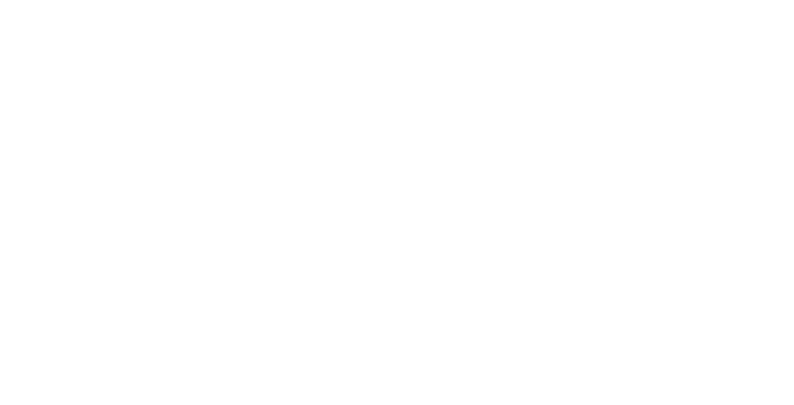

In [76]:
# Initialize the figure and block diagram
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
bd = BlockDiagram(ax)

In [77]:
# Add blocks
bd.add_block('Agent', (0.3, 0.75), 0.2, 0.15)
bd.add_block('Environment', (0.3, 0.25), 0.2, 0.15)


In [78]:
# Add arrows
bd.add_arrow((0.3, 0.85), (0.3, 0.95), 'action A_t', text_pos=(0.3, 0.9))
bd.add_arrow((0.3, 0.65), (0.3, 0.75), 'reward R_t', bidirectional=True)
bd.add_arrow((0.3, 0.15), (0.3, 0.25), 'state S_t+1', bidirectional=True)
bd.add_arrow((0.3, 0.05), (0.3, -0.05), 'reward R_t+1', text_pos=(0.3, 0))
bd.add_arrow((0.2, 0.25), (0.1, 0.25), 'state S_t', text_pos=(0.15, 0.25))

In [79]:
# Saving the figure
plt.savefig('nanoSWAI_NN_diagram.png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>